In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
csv_path = "sales_data_with_discounts.csv" if True else None
if csv_path is None:
    raise FileNotFoundError("CSV file not found in the extracted zip.")
df = pd.read_csv(csv_path)
print("Loaded dataset with shape:", df.shape)
df.head()

Loaded dataset with shape: (450, 13)


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


Columns: ['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
d

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,450,15,01-04-2021,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,450,7,Thursday,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SKU,450,30,M01,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,450,1,C,450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Volume,450.0,NaN,NaN,NaN,5.066667,4.231602,1.0,3.0,4.0,6.0,31.0
BU,450,3,Mobiles,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brand,450,9,Jeera,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,450,30,RU-10,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg Price,450.0,NaN,NaN,NaN,10453.433333,18079.90484,290.0,465.0,1450.0,10100.0,60100.0
Total Sales Value,450.0,NaN,NaN,NaN,33812.835556,50535.074173,400.0,2700.0,5700.0,53200.0,196400.0



Missing values per column:
Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

Numeric columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


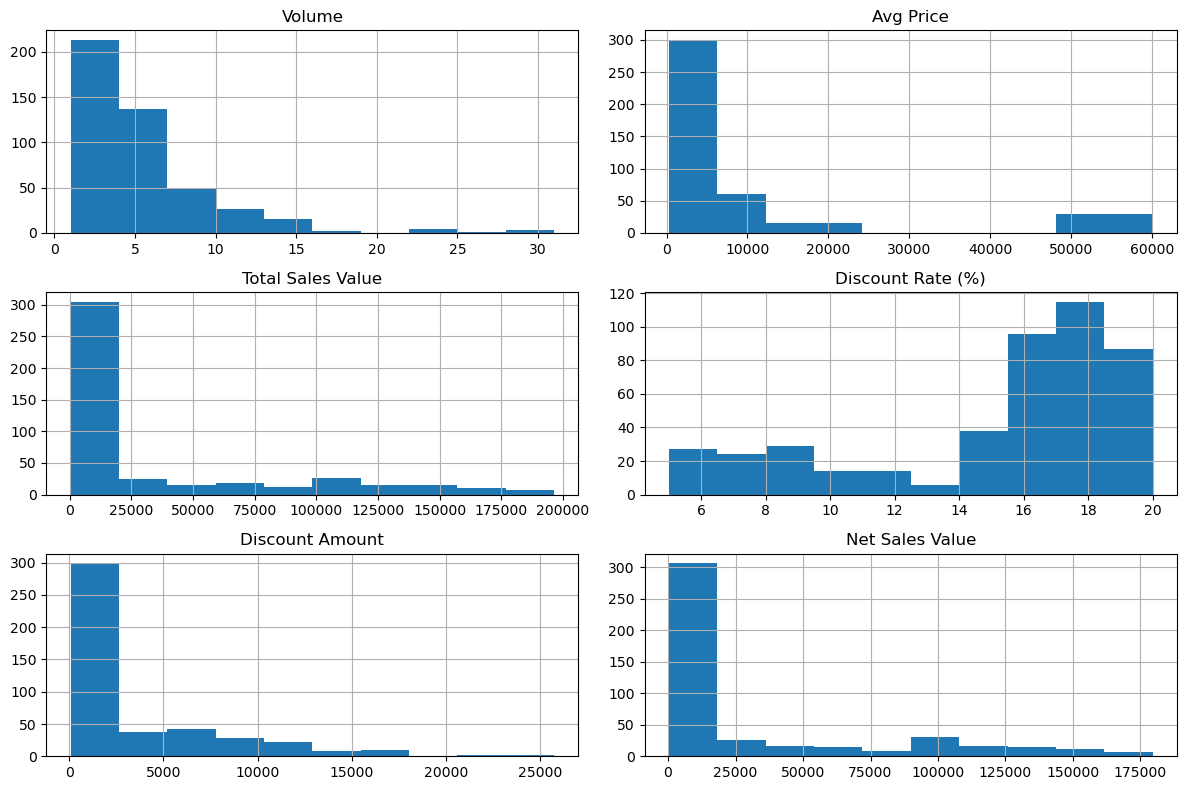

In [2]:
# Basic EDA
print("Columns:", list(df.columns))
print("\nInfo:")
print(df.info())
print("\nDescription (numeric):")
display(df.describe(include='all').transpose())

# Missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# If there are numeric columns, show histograms
num_cols = df.select_dtypes(include=['number']).columns.tolist()
if len(num_cols)>0:
    print("\nNumeric columns:", num_cols)
    df[num_cols].hist(figsize=(12, 8))
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns detected.")

Correlation matrix:


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
Volume,1.000000,-0.250878,-0.034789,0.157972,0.066297,-0.044373
Avg Price,-0.250878,1.000000,0.831978,-0.831582,0.676007,0.841166
Total Sales Value,-0.034789,0.831978,1.000000,-0.835431,0.932410,0.999382
Discount Rate (%),0.157972,-0.831582,-0.835431,1.000000,-0.657607,-0.846720
Discount Amount,0.066297,0.676007,0.932410,-0.657607,1.000000,0.919127
Net Sales Value,-0.044373,0.841166,0.999382,-0.846720,0.919127,1.000000


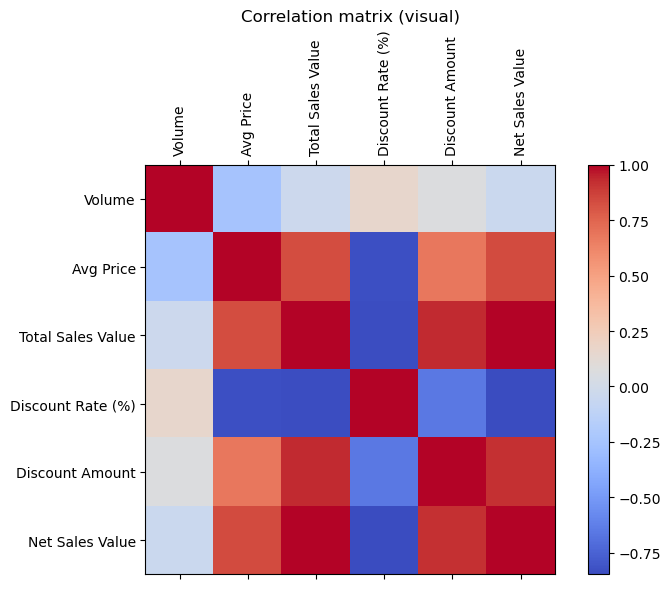

In [3]:
# Correlation matrix (numeric columns)
num_cols = df.select_dtypes(include=['number']).columns.tolist()
if len(num_cols) > 1:
    corr = df[num_cols].corr()
    print("Correlation matrix:")
    display(corr)

    fig, ax = plt.subplots(figsize=(8, 6))
    # use the numeric values for the image and set ticks/labels explicitly
    cax = ax.matshow(corr.values, cmap='coolwarm')
    fig.colorbar(cax, ax=ax)
    ax.set_xticks(range(len(num_cols)))
    ax.set_xticklabels(num_cols, rotation=90)
    ax.set_yticks(range(len(num_cols)))
    ax.set_yticklabels(num_cols)
    ax.set_title("Correlation matrix (visual)")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for correlation matrix.")


Column: Date
Date
01-04-2021    30
02-04-2021    30
03-04-2021    30
04-04-2021    30
05-04-2021    30
06-04-2021    30
07-04-2021    30
08-04-2021    30
09-04-2021    30
10-04-2021    30
11-04-2021    30
12-04-2021    30
13-04-2021    30
14-04-2021    30
15-04-2021    30
Name: count, dtype: int64


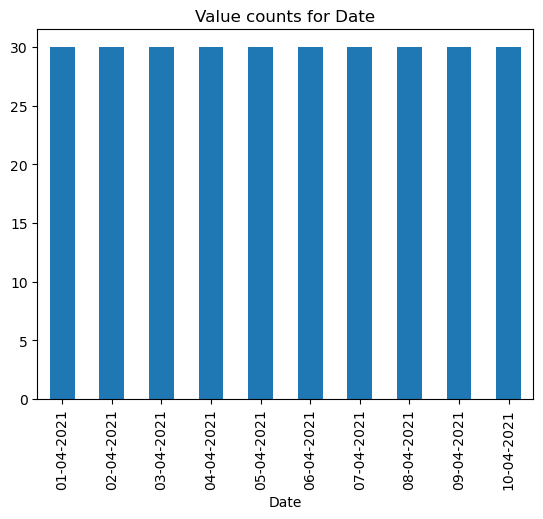


Column: Day
Day
Thursday     90
Friday       60
Saturday     60
Sunday       60
Monday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64


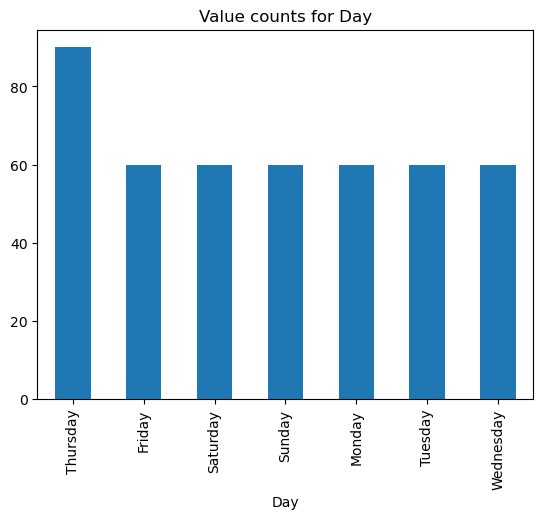


Column: SKU
SKU
M01    15
M02    15
M03    15
M04    15
M05    15
M06    15
M07    15
M08    15
M09    15
M10    15
F01    15
F02    15
F03    15
F04    15
F05    15
F06    15
F07    15
F08    15
F09    15
F10    15
Name: count, dtype: int64


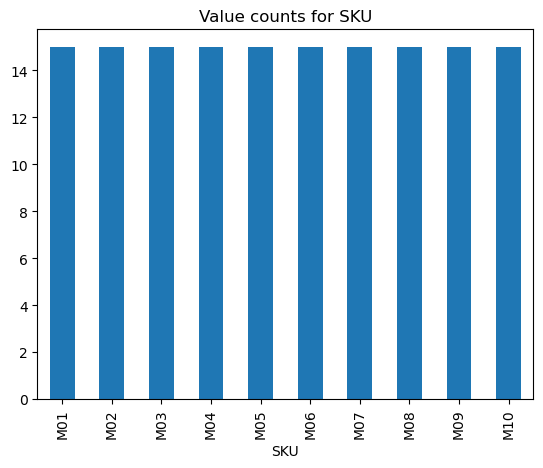


Column: City
City
C    450
Name: count, dtype: int64


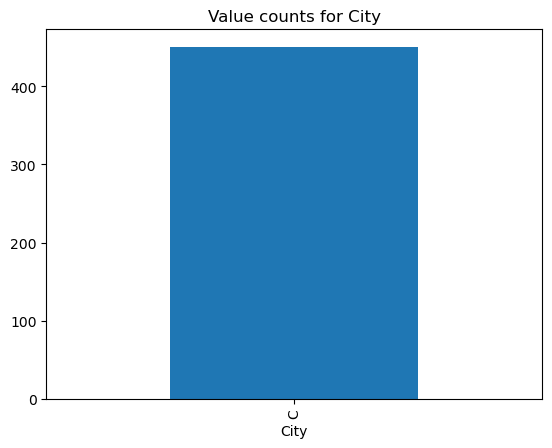


Column: BU
BU
Mobiles      150
FMCG         150
Lifestyle    150
Name: count, dtype: int64


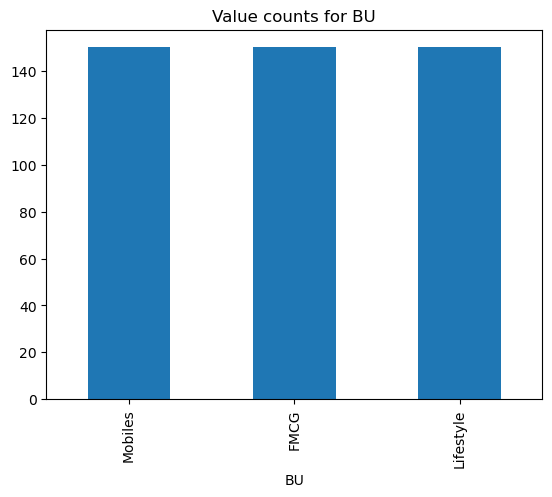


Column: Brand
Brand
Jeera      90
Viva       60
Gear       60
RealU      45
YouM       45
Babaji     45
Vedic      45
Orange     30
Sumsang    30
Name: count, dtype: int64


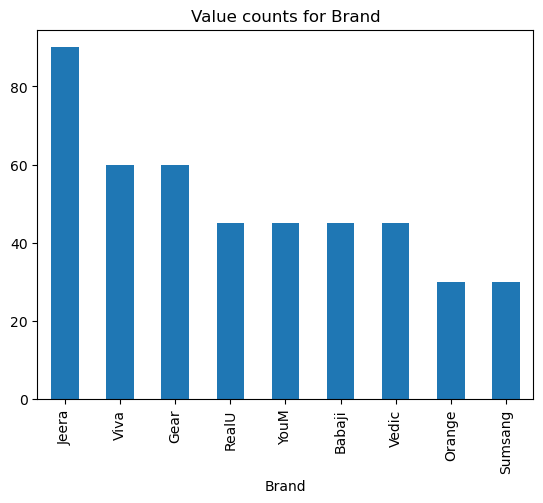


Column: Model
Model
RU-10             15
RU-9 Plus         15
YM-99             15
YM-99 Plus        15
YM-98             15
RU-9              15
S-20              15
S-21              15
O-10              15
O-11              15
Babaji Oil        15
Vedic Cream       15
Vedic Shampoo     15
Babaji Shampoo    15
Babaji Cream      15
Vedic Oil         15
Gear Oil          15
Gear Cream        15
Gear Shampoo      15
Gear BB Cream     15
Name: count, dtype: int64


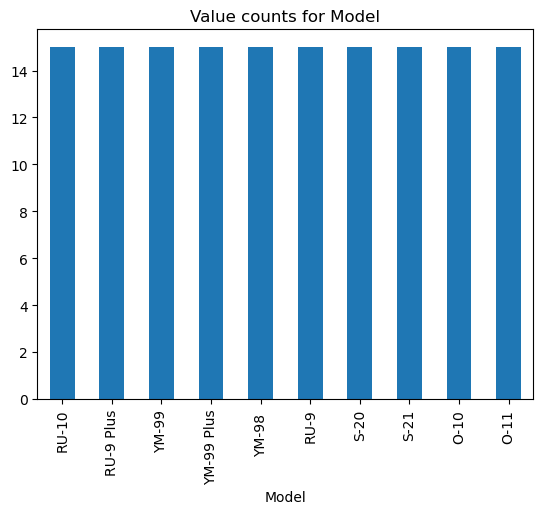


No obvious target column found. If you have one, rename it to 'target' or tell me the column name and I'll add targeted analysis.


In [4]:
# - For categorical columns: value counts and bar plots
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
for c in cat_cols:
    print("\nColumn:", c)
    print(df[c].value_counts(dropna=False).head(20))
    try:
        df[c].value_counts(dropna=False).head(10).plot(kind='bar')
        plt.title(f"Value counts for {c}")
        plt.show()
    except Exception:
        pass

# - If there's a target variable (e.g., 'target' or 'Outcome'), show group stats
possible_targets = [c for c in df.columns if c.lower() in ('target','outcome','label','y','class')]
if possible_targets:
    t = possible_targets[0]
    print("\nFound possible target column:", t)
    display(df.groupby(t).mean(numeric_only=True).transpose())
else:
    print("\nNo obvious target column found. If you have one, rename it to 'target' or tell me the column name and I'll add targeted analysis.")


In [5]:

print("sales_data_with_discounts.csv")

sales_data_with_discounts.csv



## Insights from Visualizations

### Key Observations
- The histograms show that sales-related numerical features exhibit skewness, indicating uneven distribution of values.
- Boxplots reveal the presence of outliers, especially in discount-related columns, which may influence model performance.
- Bar charts for categorical variables indicate that certain categories dominate the dataset, which can introduce bias if not handled properly.

These insights highlight the importance of preprocessing before applying machine learning models.



## One-Hot Encoding of Categorical Variables

### Why One-Hot Encoding?
Machine learning algorithms require numerical input. Categorical variables must be converted into numerical form without introducing ordinal relationships.


In [6]:

import pandas as pd

# Load dataset
df = pd.read_csv("sales_data_with_discounts.csv")

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [7]:
# Shape comparison
print("Original data shape:", df.shape)
print("Encoded data shape :", df_encoded.shape)


Original data shape: (450, 13)
Encoded data shape : (450, 94)


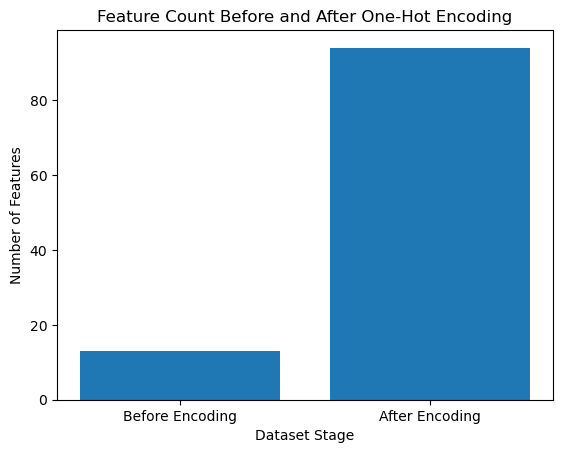

In [8]:
import matplotlib.pyplot as plt

features = ['Before Encoding', 'After Encoding']
counts = [df.shape[1], df_encoded.shape[1]]

plt.figure()
plt.bar(features, counts)
plt.xlabel("Dataset Stage")
plt.ylabel("Number of Features")
plt.title("Feature Count Before and After One-Hot Encoding")
plt.show()


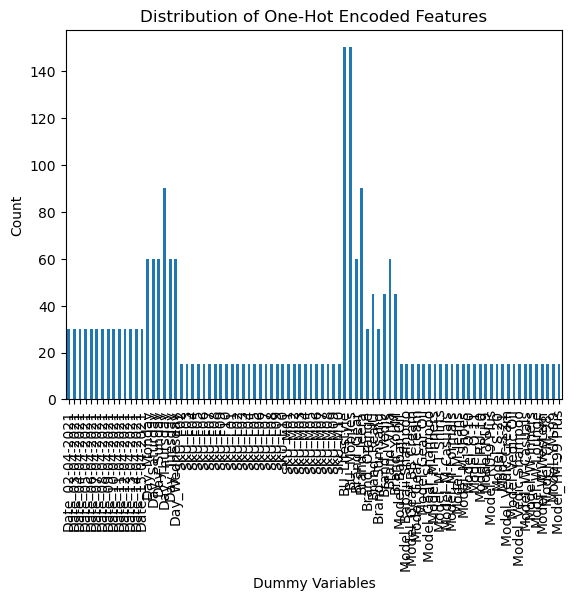

In [9]:
# Select only dummy columns
dummy_cols = [col for col in df_encoded.columns if col not in df.columns]

# Plot sum of dummy variables
plt.figure()
df_encoded[dummy_cols].sum().plot(kind='bar')
plt.xlabel("Dummy Variables")
plt.ylabel("Count")
plt.title("Distribution of One-Hot Encoded Features")
plt.xticks(rotation=90)
plt.show()


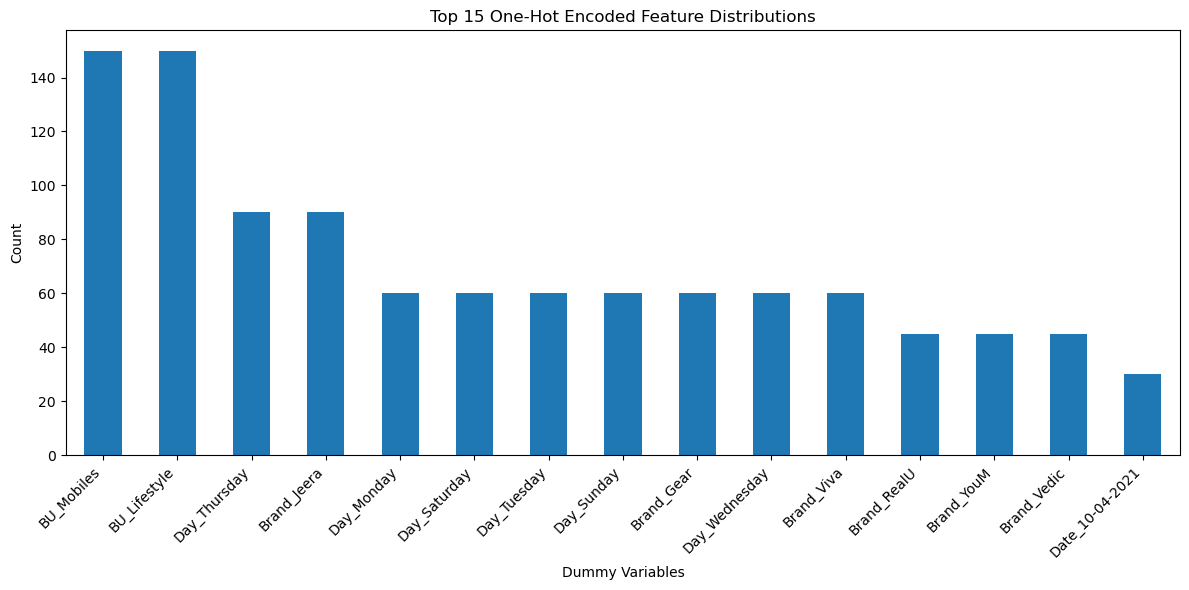

In [10]:
import matplotlib.pyplot as plt
dummy_cols = [col for col in df_encoded.columns if col not in df.columns]
dummy_counts = df_encoded[dummy_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
dummy_counts.head(15).plot(kind='bar')
plt.xlabel("Dummy Variables")
plt.ylabel("Count")
plt.title("Top 15 One-Hot Encoded Feature Distributions")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



## Conclusion

In this assignment, descriptive statistics and data visualizations provided insights into the distribution and variability of sales data.
Standardization ensured numerical features were on a comparable scale, while one-hot encoding transformed categorical variables into a machine-learning-ready format.
These preprocessing steps are essential for building reliable and unbiased analytical models.
